In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import cv2

In [2]:
!rm -r machine-learning-/  # first remove folder, if present
!git clone https://github.com/emineedagulsen/machine-learning-

Cloning into 'machine-learning-'...
remote: Enumerating objects: 39431, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 39431 (delta 5), reused 15 (delta 1), pack-reused 39407
Receiving objects: 100% (39431/39431), 823.90 MiB | 14.20 MiB/s, done.
Resolving deltas: 100% (396/396), done.
Checking out files: 100% (12278/12278), done.


In [3]:
targetSize = 224 # pixel dimension after ImageDataGenerator has processed
color = "grayscale" # use "rgb" for color images
classMode='binary' # use 'categorical' for >2 class, 'binary' for two-class problems
trainingFiles = 'machine-learning-/solid_waste/train' # change according to your setup
testFile = 'machine-learning-/solid_waste/test'



In [4]:
trainingFiles2 = 'machine-learning-/solid_waste/train/black' # change according to your setup
testFile2 = 'machine-learning-/solid_waste/test/black'
trainingFiles3 = 'machine-learning-/solid_waste/train/white' # change according to your setup
testFile3 = 'machine-learning-/solid_waste/test/white'

In [5]:

#%pylab inline
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#img = mpimg.imread(singleTestFile)
#imgplot = plt.imshow(img)
#plt.show()


In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,  # change pixel value from 0-255 to 0.0 - 1.0
         shear_range=0.2, # distort the image sideways
        zoom_range=0.2,
        horizontal_flip=True
        )

        

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

TRAINING FOR BLACK OR WHİTE


In [8]:
training_set = train_datagen.flow_from_directory(
        trainingFiles, # path to folder with images
        target_size=(targetSize, targetSize), # size of output image, here we used 28 x 28 pixel
        batch_size=11, # how many images to load at a time
        class_mode=classMode, # use 'categorical' for >2 class, 'binary' for two-class problems
        color_mode=color)   # use 'grayscale' for black/white, 'rgb' for color

Found 583 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
        testFile, # path to folder with images
        target_size=(targetSize, targetSize), # size of output image, here we used 28 x 28 pixel
        batch_size=7, # how many images to load at a time
        class_mode=classMode, # use 'categorical' for >2 class, 'binary' for two-class problems
        color_mode=color)   # use 'grayscale' for black/white, 'rgb' for color

Found 959 images belonging to 2 classes.


*TRAINING* FOR BLACK



In [10]:
training_set2 = train_datagen.flow_from_directory(
        trainingFiles2, # path to folder with images
        target_size=(targetSize, targetSize), # size of output image, here we used 28 x 28 pixel
        batch_size=23, # how many images to load at a time
        class_mode=classMode, # use 'categorical' for >2 class, 'binary' for two-class problems
        color_mode=color)   # use 'grayscale' for black/white, 'rgb' for color

Found 322 images belonging to 2 classes.


In [11]:
test_set2 = test_datagen.flow_from_directory(
        testFile2, # path to folder with images
        target_size=(targetSize, targetSize), # size of output image, here we used 28 x 28 pixel
        batch_size=24, # how many images to load at a time
        class_mode=classMode, # use 'categorical' for >2 class, 'binary' for two-class problems
        color_mode=color)   # use 'grayscale' for black/white, 'rgb' for color

Found 698 images belonging to 2 classes.


TRAINING FOR WHITE

In [12]:
training_set3 = train_datagen.flow_from_directory(
        trainingFiles3, # path to folder with images
        target_size=(targetSize, targetSize), # size of output image, here we used 28 x 28 pixel
        batch_size=9, # how many images to load at a time
        class_mode=classMode, # use 'categorical' for >2 class, 'binary' for two-class problems
        color_mode=color)   # use 'grayscale' for black/white, 'rgb' for color

Found 261 images belonging to 2 classes.


In [13]:
test_set3 = test_datagen.flow_from_directory(
        testFile3, # path to folder with images
        target_size=(targetSize, targetSize), # size of output image, here we used 28 x 28 pixel
        batch_size=29, # how many images to load at a time
        class_mode=classMode, # use 'categorical' for >2 class, 'binary' for two-class problems
        color_mode=color)   # use 'grayscale' for black/white, 'rgb' for color

Found 261 images belonging to 2 classes.


MODEL FOR BLACK-WHITE

In [29]:

model = Sequential() # instantiate new model object

model.add(Conv2D(filters=2,  # specify number of filters. Higher number for more complex images.
               kernel_size=3,  # size of filter - typically 3, as in 3x3
               activation="relu", # activation function, often 'relu' on layers before last
               input_shape=[targetSize,targetSize,1]))
model.add(Conv2D(filters=2,  # specify number of filters. Higher number for more complex images.
               kernel_size=3,  # size of filter - typically 3, as in 3x3
               activation="relu", # activation function, often 'relu' on layers before last
              )) # dimension of image, coming in from training set. 
               # here 28x28 pixel. '1' is number of color channels. B/W = 1, Color = 3.

model.add(MaxPool2D(pool_size=2, strides=2)) 

model.add(Flatten())
# add fully connected layer (just as with DNN Step 11 above)
model.add(Dense(15,activation='relu'))
model.add(Dense(14,activation='relu'))

model.add(Dense(1, activation="sigmoid")) # one single output neuron and sigmoid ac. func.

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy']) 
# here parameters are set to solve a two-class problem. Hence binary_crossentropy. 

In [30]:
model.fit(x=training_set, validation_data=test_set, epochs=10)


Epoch 1/10
53/53 [==============================] - 28s 522ms/step - loss: 0.6056 - accuracy: 0.6484 - val_loss: 0.1289 - val_accuracy: 1.0000
Epoch 2/10
53/53 [==============================] - 28s 540ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 3.1298e-04 - val_accuracy: 1.0000
Epoch 3/10
53/53 [==============================] - 30s 566ms/step - loss: 3.6498e-04 - accuracy: 1.0000 - val_loss: 1.8698e-04 - val_accuracy: 1.0000
Epoch 4/10
53/53 [==============================] - 27s 517ms/step - loss: 2.4690e-04 - accuracy: 1.0000 - val_loss: 1.2577e-04 - val_accuracy: 1.0000
Epoch 5/10
53/53 [==============================] - 27s 517ms/step - loss: 1.8719e-04 - accuracy: 1.0000 - val_loss: 1.0199e-04 - val_accuracy: 1.0000
Epoch 6/10
53/53 [==============================] - 29s 543ms/step - loss: 1.3869e-04 - accuracy: 1.0000 - val_loss: 8.2804e-05 - val_accuracy: 1.0000
Epoch 7/10
53/53 [==============================] - 28s 524ms/step - loss: 1.1251e-04 - accuracy: 1.0000 -

In [31]:
model.evaluate(test_set)

137/137 [==============================] - 14s 99ms/step - loss: 3.8281e-05 - accuracy: 1.0000


[3.82811194867827e-05, 1.0]

In [17]:
training_set.class_indices

{'black': 0, 'white': 1}

 MODEL FOR BLACK PLASTIC OR METAL

In [32]:

modelA = Sequential() # instantiate new model object

modelA.add(Conv2D(filters=2,  # specify number of filters. Higher number for more complex images.
               kernel_size=3,  # size of filter - typically 3, as in 3x3
               activation="relu", # activation function, often 'relu' on layers before last
               input_shape=[targetSize,targetSize,1])) # dimension of image, coming in from training set. 
               # here 28x28 pixel. '1' is number of color channels. B/W = 1, Color = 3.

modelA.add(MaxPool2D(pool_size=2, strides=2)) 

modelA.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(9,activation='relu'))


modelA.add(Dense(1, activation="sigmoid")) # one single output neuron and sigmoid ac. func.

adam = Adam(learning_rate=0.001)
modelA.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy']) 
# here parameters are set to solve a two-class problem. Hence binary_crossentropy. 

In [33]:
modelA.fit(x=training_set2, validation_data=test_set2, epochs=10)


Epoch 1/10
14/14 [==============================] - 11s 774ms/step - loss: 0.7267 - accuracy: 0.7019 - val_loss: 0.6497 - val_accuracy: 0.5344
Epoch 2/10
14/14 [==============================] - 10s 755ms/step - loss: 0.4868 - accuracy: 0.7888 - val_loss: 0.5144 - val_accuracy: 0.7321
Epoch 3/10
14/14 [==============================] - 10s 753ms/step - loss: 0.4443 - accuracy: 0.7919 - val_loss: 0.4265 - val_accuracy: 0.8295
Epoch 4/10
14/14 [==============================] - 10s 753ms/step - loss: 0.4289 - accuracy: 0.7981 - val_loss: 0.5602 - val_accuracy: 0.6691
Epoch 5/10
14/14 [==============================] - 10s 758ms/step - loss: 0.3740 - accuracy: 0.8354 - val_loss: 0.3973 - val_accuracy: 0.8123
Epoch 6/10
14/14 [==============================] - 10s 750ms/step - loss: 0.3742 - accuracy: 0.8230 - val_loss: 0.3660 - val_accuracy: 0.8481
Epoch 7/10
14/14 [==============================] - 10s 758ms/step - loss: 0.3271 - accuracy: 0.8602 - val_loss: 0.3189 - val_accuracy: 0.8811

In [35]:
modelA.evaluate(test_set2)

30/30 [==============================] - 6s 181ms/step - loss: 0.3070 - accuracy: 0.8840


[0.30703556537628174, 0.8839541673660278]

In [36]:
training_set2.class_indices

{'glass': 0, 'metal': 1}

 MODEL FOR WHITE PLASTIC OR METAL







In [22]:

modelB= Sequential() # instantiate new model object

modelB.add(Conv2D(filters=2,  # specify number of filters. Higher number for more complex images.
               kernel_size=3,  # size of filter - typically 3, as in 3x3
               activation="relu", # activation function, often 'relu' on layers before last
               input_shape=[targetSize,targetSize,1])) # dimension of image, coming in from training set. 
               # here 28x28 pixel. '1' is number of color channels. B/W = 1, Color = 3.



modelB.add(MaxPool2D(pool_size=2, strides=2)) 


modelB.add(Flatten())

model.add(Dense(8,activation='relu'))
model.add(Dense(7,activation='relu'))


modelB.add(Dense(1, activation="sigmoid")) # one single output neuron and sigmoid ac. func.

adam = Adam(learning_rate=0.001)
modelB.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy']) 
# here parameters are set to solve a two-class problem. Hence binary_crossentropy. 

In [23]:
modelB.fit(x=training_set3, validation_data=test_set3, epochs=10)


Epoch 1/10
29/29 [==============================] - 7s 222ms/step - loss: 0.7031 - accuracy: 0.5249 - val_loss: 0.6821 - val_accuracy: 0.7050
Epoch 2/10
29/29 [==============================] - 6s 213ms/step - loss: 0.6669 - accuracy: 0.6552 - val_loss: 0.6027 - val_accuracy: 0.6513
Epoch 3/10
29/29 [==============================] - 6s 213ms/step - loss: 0.6135 - accuracy: 0.6705 - val_loss: 0.5773 - val_accuracy: 0.6782
Epoch 4/10
29/29 [==============================] - 6s 213ms/step - loss: 0.5803 - accuracy: 0.6935 - val_loss: 0.5438 - val_accuracy: 0.6858
Epoch 5/10
29/29 [==============================] - 6s 212ms/step - loss: 0.5520 - accuracy: 0.7203 - val_loss: 0.5543 - val_accuracy: 0.6743
Epoch 6/10
29/29 [==============================] - 6s 213ms/step - loss: 0.5563 - accuracy: 0.6897 - val_loss: 0.5205 - val_accuracy: 0.6973
Epoch 7/10
29/29 [==============================] - 6s 214ms/step - loss: 0.5214 - accuracy: 0.7395 - val_loss: 0.5361 - val_accuracy: 0.7433
Epoch 

In [24]:
modelB.evaluate(test_set3)

9/9 [==============================] - 2s 213ms/step - loss: 0.4253 - accuracy: 0.8812


[0.4253184199333191, 0.8812260627746582]

In [25]:
training_set3.class_indices

{'glass': 0, 'metal': 1}

Populating the interactive namespace from numpy and matplotlib


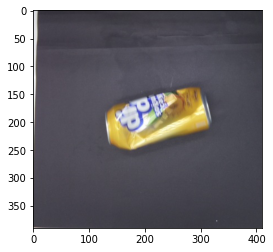

In [38]:
singleTestFile ='machine-learning-/solid_waste/predict/black/metal/1 (252).jpg'#predict a single new image.

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(singleTestFile)
imgplot = plt.imshow(img)
plt.show()

In [40]:
test_image = image.load_img(singleTestFile, target_size=[targetSize,targetSize], color_mode=color)
# here set the SAME parameters as on the training in Step 4.
test_image = image.img_to_array(test_image) # convert image to array
test_image = np.expand_dims(test_image,axis=0) # add one extra dimension to hold batch column.
# axis=0 means that the new dimension will be added on the row. Axis = 1 will add to the column.
result = model.predict(test_image/255.0) # remember to divide each pixel value by 255.0
result2 = modelA.predict(test_image/255.0) # remember to divide each pixel value by 255.0
result3 = modelB.predict(test_image/255.0) # remember to divide each pixel value by 255.0


print("result is: " + str(result[0][0]))
if result[0][0]>0.5:
  print("WHITE")  # depending on the value of training_set.class_indices
  print("result for white background is: " + str(result3[0][0]))
  if result3[0][0]>0.5:
      print("METAL")  # depending on the value of training_set.class_indices

  else:
      print("GLASS")
 

else:
  print("BLACK")
  print("result for black background is: " + str(result2[0][0]))
  if result2[0][0]>0.5:
    print("METAL")  # depending on the value of training_set.class_indices

  else:
    print("GLASS")



result is: 4.0757314e-07
BLACK
result for black background is: 0.99431705
METAL
